In [ ]:
import pandas as pd
price = pd.read_csv('/content/Bitcoin Historical Data (2).csv')
sentiment=pd.read_csv('/content/bitcoin_sentiments_21_24.csv')

In [ ]:
price

,Date,Price,Open,High,Low,Vol.,Change %
0,31-12-2023,"42,272.5","42,141.6","42,878.8","41,971.4",35.58K,0.32%
1,30-12-2023,"42,136.7","42,074.7","42,592.2","41,527.3",35.18K,0.15%
2,29-12-2023,"42,072.4","42,581.1","43,108.0","41,459.0",60.98K,-1.19%
3,28-12-2023,"42,581.1","43,446.5","43,782.6","42,309.3",49.84K,-1.99%
4,27-12-2023,"43,446.5","42,514.3","43,676.7","42,115.3",50.10K,2.20%
...,...,...,...,...,...,...,...
1090,05-01-2021,"33,991.5","32,015.4","34,414.7","30,010.5",202.13K,6.15%
1091,04-01-2021,"32,022.6","33,016.6","33,587.5","28,204.5",255.27K,-2.84%
1092,03-01-2021,"32,958.9","32,192.9","34,755.9","32,029.6",155.21K,2.38%
1093,02-01-2021,"32,193.3","29,359.7","33,233.5","29,008.0",240.87K,9.65%


In [ ]:
price = price.iloc[::-1].reset_index(drop=True)
price

,Date,Price,Open,High,Low,Vol.,Change %
0,01-01-2021,"29,359.9","28,951.7","29,627.1","28,712.4",100.90K,1.42%
1,02-01-2021,"32,193.3","29,359.7","33,233.5","29,008.0",240.87K,9.65%
2,03-01-2021,"32,958.9","32,192.9","34,755.9","32,029.6",155.21K,2.38%
3,04-01-2021,"32,022.6","33,016.6","33,587.5","28,204.5",255.27K,-2.84%
4,05-01-2021,"33,991.5","32,015.4","34,414.7","30,010.5",202.13K,6.15%
...,...,...,...,...,...,...,...
1090,27-12-2023,"43,446.5","42,514.3","43,676.7","42,115.3",50.10K,2.20%
1091,28-12-2023,"42,581.1","43,446.5","43,782.6","42,309.3",49.84K,-1.99%
1092,29-12-2023,"42,072.4","42,581.1","43,108.0","41,459.0",60.98K,-1.19%
1093,30-12-2023,"42,136.7","42,074.7","42,592.2","41,527.3",35.18K,0.15%


In [ ]:
price.dtypes

,0
Date,object
Price,object
Open,object
High,object
Low,object
Vol.,object
Change %,object


In [ ]:
price['Date'] = pd.to_datetime(price['Date'], format='%d-%m-%Y', errors='coerce')
price['Date'] = price['Date'].dt.date
price

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-01-01,"29,359.9","28,951.7","29,627.1","28,712.4",100.90K,1.42%
1,2021-01-02,"32,193.3","29,359.7","33,233.5","29,008.0",240.87K,9.65%
2,2021-01-03,"32,958.9","32,192.9","34,755.9","32,029.6",155.21K,2.38%
3,2021-01-04,"32,022.6","33,016.6","33,587.5","28,204.5",255.27K,-2.84%
4,2021-01-05,"33,991.5","32,015.4","34,414.7","30,010.5",202.13K,6.15%
...,...,...,...,...,...,...,...
1090,2023-12-27,"43,446.5","42,514.3","43,676.7","42,115.3",50.10K,2.20%
1091,2023-12-28,"42,581.1","43,446.5","43,782.6","42,309.3",49.84K,-1.99%
1092,2023-12-29,"42,072.4","42,581.1","43,108.0","41,459.0",60.98K,-1.19%
1093,2023-12-30,"42,136.7","42,074.7","42,592.2","41,527.3",35.18K,0.15%


In [ ]:
def convert_volume(vol_str):
    if isinstance(vol_str, str):
        if vol_str.endswith('K'):
            return float(vol_str[:-1]) * 1000
        elif vol_str.endswith('M'):
            return float(vol_str[:-1]) * 1000000
        elif vol_str.endswith('B'):  # Handle billions
            return float(vol_str[:-1]) * 1000000000
        else:
            try:
                print(vol_str)
                return float(vol_str)
            except ValueError:
                print(vol_str)
                return None  # Use None instead of empty return for better clarity
    else:
        return vol_str  # Return the value unchanged if it's not a string

# Applying the function to the DataFrame
price['Vol.'] = price['Vol.'].apply(convert_volume)

# Convert other columns as before
price['Price'] = price['Price'].astype(str).str.replace(',', '').astype(float)
price['Open'] = price['Open'].astype(str).str.replace(',', '').astype(float)
price['High'] = price['High'].astype(str).str.replace(',', '').astype(float)
price['Low'] = price['Low'].astype(str).str.replace(',', '').astype(float)
price['Change %'] = price['Change %'].astype(str).str.replace('%', '').str.replace(',', '').astype(float)

# Final type casting to ensure all columns are of the correct type
price['Price'] = price['Price'].astype(float)
price['Open'] = price['Open'].astype(float)
price['High'] = price['High'].astype(float)
price['Low'] = price['Low'].astype(float)
price['Vol.'] = price['Vol.'].astype(float)
price['Change %'] = price['Change %'].astype(float)


In [ ]:
price.isnull().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,0
Change %,0


In [ ]:
price.describe()

,Price,Open,High,Low,Vol.,Change %
count,1095.000000,1095.000000,1095.000000,1095.000000,1.095000e+03,1095.000000
mean,34816.069863,34804.290776,35636.033333,33895.309589,5.537300e+07,0.092219
std,12546.311251,12545.323573,12915.894346,12105.296359,3.274580e+08,3.396028
min,15776.200000,15776.600000,16274.600000,15504.200000,2.600000e+02,-15.630000
25%,24665.550000,24665.450000,25235.300000,24222.950000,5.592500e+04,-1.460000
50%,32241.300000,32192.900000,33307.700000,30850.000000,9.727000e+04,-0.040000
75%,43484.500000,43484.650000,44247.300000,42478.900000,2.097650e+05,1.600000
max,67527.900000,67528.700000,68990.600000,66334.900000,4.470000e+09,19.410000


In [ ]:
sentiment

,Date,Short Description,Accurate Sentiments
0,2021-11-05 04:42:00,Bitcoin price is consolidating near the USD 62...,0.998558
1,2021-11-05 08:15:00,Congress could finally approve or reject the m...,0.000000
2,2021-11-05 10:24:00,Bitcoin increasingly becoming a political inst...,0.000000
3,2021-11-05 16:58:00,There is still potential for the price of bitc...,0.999458
4,2021-11-05 21:00:00,'Several companies' are looking to Latin Ameri...,0.000000
...,...,...,...
11290,2024-09-12 00:00:00,The government of El Salvador has been buying ...,0.000000
11291,2024-09-12 00:00:00,"According to data from mempool.space, transact...",0.997017
11292,2024-09-12 00:00:00,Time Magazine reporter Vera Bergengruen believ...,0.000000
11293,2024-09-12 00:00:00,"in bitcoin is concentrated at around $58,500,...",0.000000


In [ ]:
sentiment = sentiment.drop('Short Description', axis=1)
sentiment

,Date,Accurate Sentiments
0,2021-11-05 04:42:00,0.998558
1,2021-11-05 08:15:00,0.000000
2,2021-11-05 10:24:00,0.000000
3,2021-11-05 16:58:00,0.999458
4,2021-11-05 21:00:00,0.000000
...,...,...
11290,2024-09-12 00:00:00,0.000000
11291,2024-09-12 00:00:00,0.997017
11292,2024-09-12 00:00:00,0.000000
11293,2024-09-12 00:00:00,0.000000


In [ ]:
sentiment.dtypes

,0
Date,object
Accurate Sentiments,float64


In [ ]:
sentiment['Date'] = pd.to_datetime(sentiment['Date'], errors='coerce')
sentiment['Date'] = sentiment['Date'].dt.date
sentiment

,Date,Accurate Sentiments
0,2021-11-05,0.998558
1,2021-11-05,0.000000
2,2021-11-05,0.000000
3,2021-11-05,0.999458
4,2021-11-05,0.000000
...,...,...
11290,2024-09-12,0.000000
11291,2024-09-12,0.997017
11292,2024-09-12,0.000000
11293,2024-09-12,0.000000


In [ ]:
sentiment.isnull().sum()

,0
Date,0
Accurate Sentiments,0


In [ ]:
# Sort the sentiment dataset by date
sentiment = sentiment.sort_values(by='Date')
price = price.sort_values(by='Date')

In [ ]:
cumulative_sentiment_data = []

current_date = None
cumulative_sentiment = 0

for index, row in sentiment.iterrows():
    if current_date is None:
        current_date = row['Date']
        cumulative_sentiment = row['Accurate Sentiments']
    elif row['Date'] == current_date:
        cumulative_sentiment += row['Accurate Sentiments']
    else:
        cumulative_sentiment_data.append({'Date': current_date, 'Cumulative Sentiment': cumulative_sentiment})

        current_date = row['Date']
        cumulative_sentiment = row['Accurate Sentiments']

cumulative_sentiment_data.append({'Date': current_date, 'Cumulative Sentiment': cumulative_sentiment})
sentiment = pd.DataFrame(cumulative_sentiment_data)
sentiment

,Date,Cumulative Sentiment
0,2021-11-05,1.998016
1,2021-11-06,0.000000
2,2021-11-08,-0.839764
3,2021-11-09,0.999633
4,2021-11-10,-0.996722
...,...,...
882,2024-09-08,-1.301715
883,2024-09-09,7.035380
884,2024-09-10,13.908900
885,2024-09-11,-10.541270


In [ ]:
print((sentiment['Cumulative Sentiment'] == 0.000).sum())

19


In [ ]:
print("Minimum Date in price database:", price['Date'].min())
print("Maximum Date in price database:", price['Date'].max())
print("Minimum Date in sentiment database:", sentiment['Date'].min())
print("Maximum Date in sentiment database:", sentiment['Date'].max())

Minimum Date in price database: 2021-01-01
Maximum Date in price database: 2023-12-31
Minimum Date in sentiment database: 2021-11-05
Maximum Date in sentiment database: 2024-09-12


In [ ]:
start_date = pd.to_datetime('2021-11-05').date()
end_date = pd.to_datetime('2023-12-31').date()
price = price[(price['Date'] >= start_date) & (price['Date'] <= end_date)]
sentiment = sentiment[(sentiment['Date'] >= start_date) & (sentiment['Date'] <= end_date)]

In [ ]:
final_df = pd.merge(price, sentiment, on='Date', how='left')
final_df

,Date,Price,Open,High,Low,Vol.,Change %,Cumulative Sentiment
0,2021-11-05,60974.3,61411.5,62560.3,60742.4,44460.0,-0.71,1.998016
1,2021-11-06,61483.9,60973.2,61543.2,60093.6,34890.0,0.84,0.000000
2,2021-11-07,63273.2,61483.8,63273.2,61347.2,34340.0,2.91,NaN
3,2021-11-08,67527.9,63276.4,67763.3,63276.4,81080.0,6.72,-0.839764
4,2021-11-09,66904.4,67528.7,68493.3,66334.9,66130.0,-0.92,0.999633
...,...,...,...,...,...,...,...,...
782,2023-12-27,43446.5,42514.3,43676.7,42115.3,50100.0,2.20,NaN
783,2023-12-28,42581.1,43446.5,43782.6,42309.3,49840.0,-1.99,NaN
784,2023-12-29,42072.4,42581.1,43108.0,41459.0,60980.0,-1.19,NaN
785,2023-12-30,42136.7,42074.7,42592.2,41527.3,35180.0,0.15,0.999580


In [ ]:
final_df.isnull().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,0
Change %,0
Cumulative Sentiment,30


In [ ]:
final_df['sentiment_null'] = 0
final_df.loc[final_df['Cumulative Sentiment'].isnull(), 'sentiment_null'] = 1
final_df

,Date,Price,Open,High,Low,Vol.,Change %,Cumulative Sentiment,sentiment_null
0,2021-11-05,60974.3,61411.5,62560.3,60742.4,44460.0,-0.71,1.998016,0
1,2021-11-06,61483.9,60973.2,61543.2,60093.6,34890.0,0.84,0.000000,0
2,2021-11-07,63273.2,61483.8,63273.2,61347.2,34340.0,2.91,NaN,1
3,2021-11-08,67527.9,63276.4,67763.3,63276.4,81080.0,6.72,-0.839764,0
4,2021-11-09,66904.4,67528.7,68493.3,66334.9,66130.0,-0.92,0.999633,0
...,...,...,...,...,...,...,...,...,...
782,2023-12-27,43446.5,42514.3,43676.7,42115.3,50100.0,2.20,NaN,1
783,2023-12-28,42581.1,43446.5,43782.6,42309.3,49840.0,-1.99,NaN,1
784,2023-12-29,42072.4,42581.1,43108.0,41459.0,60980.0,-1.19,NaN,1
785,2023-12-30,42136.7,42074.7,42592.2,41527.3,35180.0,0.15,0.999580,0


In [ ]:
if pd.isnull(final_df['Cumulative Sentiment'].iloc[0]):
    for i in range(1, len(final_df)):
        if pd.notnull(final_df['Cumulative Sentiment'].iloc[i]):
            final_df.loc[0, 'Cumulative Sentiment'] = final_df['Cumulative Sentiment'].iloc[i]
            break

for i in range(1, len(final_df) - 1):
    if pd.isnull(final_df['Cumulative Sentiment'].iloc[i]):
        c1 = 1
        while pd.isnull(final_df['Cumulative Sentiment'].iloc[i - c1]):
            c1 += 1
        pred_val = final_df['Cumulative Sentiment'].iloc[i - c1]

        c2 = 1
        while pd.isnull(final_df['Cumulative Sentiment'].iloc[i + c2]):
            c2 += 1
        succ_val = final_df['Cumulative Sentiment'].iloc[i + c2]

        if pd.notnull(pred_val) and pd.notnull(succ_val):
            final_df.loc[i, 'Cumulative Sentiment'] = (pred_val + succ_val) / 2

if pd.isnull(final_df['Cumulative Sentiment'].iloc[-1]):
    for i in range(len(final_df) - 2, -1, -1):
        if pd.notnull(final_df['Cumulative Sentiment'].iloc[i]):
            final_df.loc[len(final_df) - 1, 'Cumulative Sentiment'] = final_df['Cumulative Sentiment'].iloc[i]
            break

print(final_df.isnull().sum())


Date                    0
Price                   0
Open                    0
High                    0
Low                     0
Vol.                    0
Change %                0
Cumulative Sentiment    0
sentiment_null          0
dtype: int64


In [ ]:
final_df

,Date,Price,Open,High,Low,Vol.,Change %,Cumulative Sentiment,sentiment_null
0,2021-11-05,60974.3,61411.5,62560.3,60742.4,44460.0,-0.71,1.998016,0
1,2021-11-06,61483.9,60973.2,61543.2,60093.6,34890.0,0.84,0.000000,0
2,2021-11-07,63273.2,61483.8,63273.2,61347.2,34340.0,2.91,-0.419882,1
3,2021-11-08,67527.9,63276.4,67763.3,63276.4,81080.0,6.72,-0.839764,0
4,2021-11-09,66904.4,67528.7,68493.3,66334.9,66130.0,-0.92,0.999633,0
...,...,...,...,...,...,...,...,...,...
782,2023-12-27,43446.5,42514.3,43676.7,42115.3,50100.0,2.20,0.999580,1
783,2023-12-28,42581.1,43446.5,43782.6,42309.3,49840.0,-1.99,0.999580,1
784,2023-12-29,42072.4,42581.1,43108.0,41459.0,60980.0,-1.19,0.999580,1
785,2023-12-30,42136.7,42074.7,42592.2,41527.3,35180.0,0.15,0.999580,0


In [ ]:
final_df.to_csv('data_collection.csv', index=False)

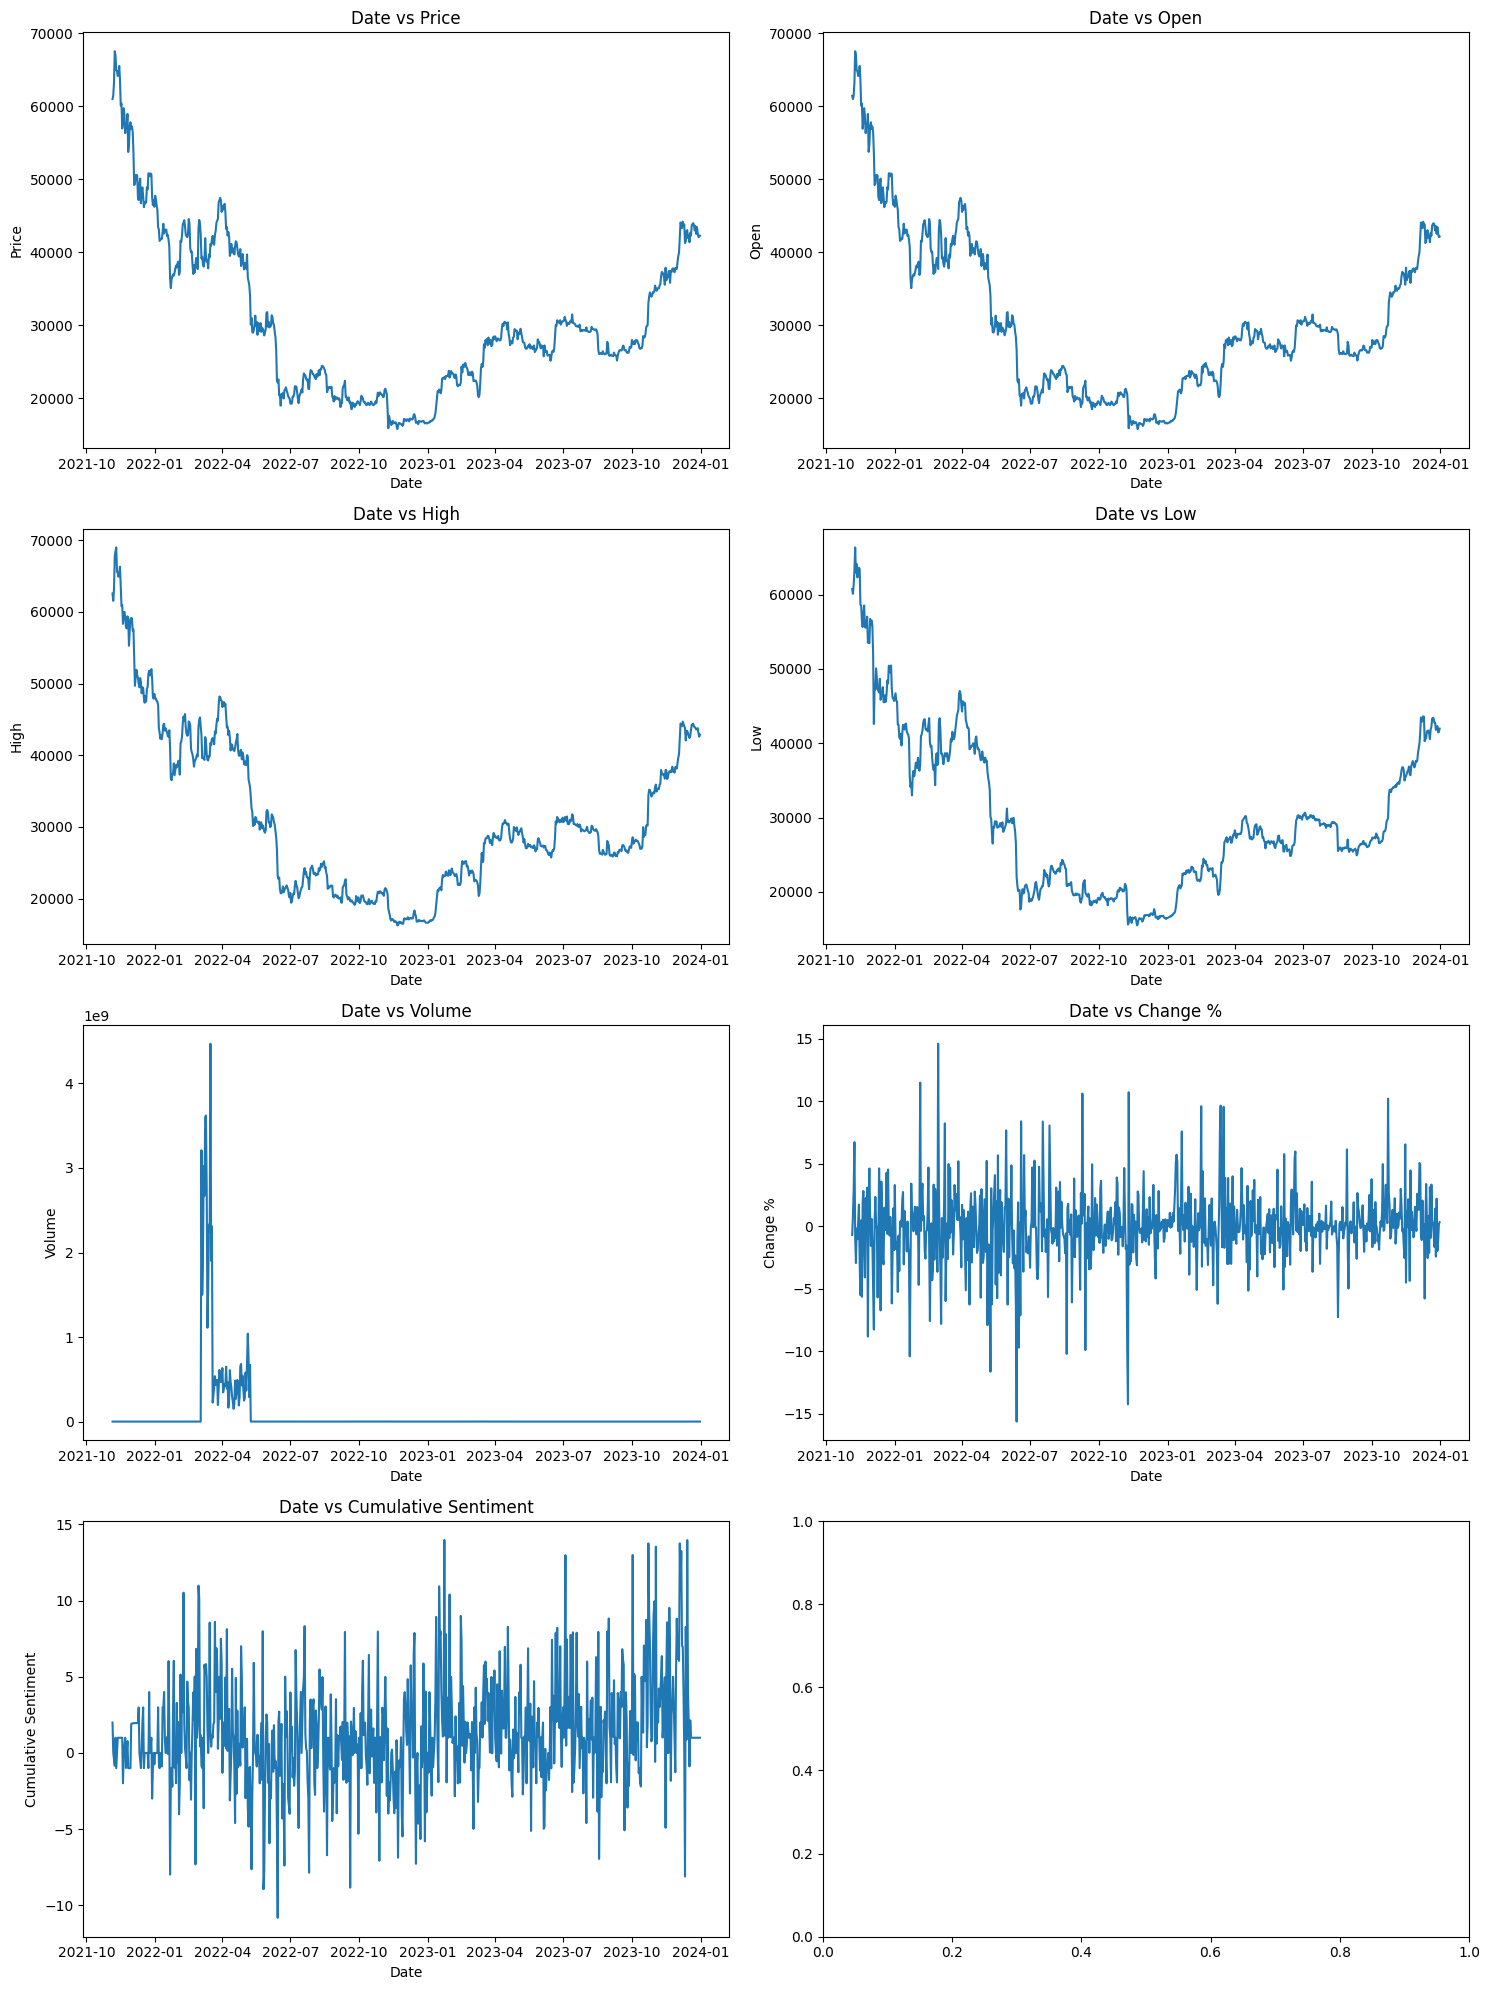

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

axes = axes.flatten()


# Plot 1: Date vs Price
axes[0].plot(final_df['Date'], final_df['Price'])
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price')
axes[0].set_title('Date vs Price')


# Plot 2: Date vs Open
axes[1].plot(final_df['Date'], final_df['Open'])
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Open')
axes[1].set_title('Date vs Open')

# Plot 3: Date vs High
axes[2].plot(final_df['Date'], final_df['High'])
axes[2].set_xlabel('Date')
axes[2].set_ylabel('High')
axes[2].set_title('Date vs High')

# Plot 4: Date vs Low
axes[3].plot(final_df['Date'], final_df['Low'])
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Low')
axes[3].set_title('Date vs Low')

# Plot 5: Date vs Volume
axes[4].plot(final_df['Date'], final_df['Vol.'])
axes[4].set_xlabel('Date')
axes[4].set_ylabel('Volume')
axes[4].set_title('Date vs Volume')

# Plot 6: Date vs Change %
axes[5].plot(final_df['Date'], final_df['Change %'])
axes[5].set_xlabel('Date')
axes[5].set_ylabel('Change %')
axes[5].set_title('Date vs Change %')

# Plot 7: Date vs Cumulative Sentiment
axes[6].plot(final_df['Date'], final_df['Cumulative Sentiment'])
axes[6].set_xlabel('Date')
axes[6].set_ylabel('Cumulative Sentiment')
axes[6].set_title('Date vs Cumulative Sentiment')



# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()

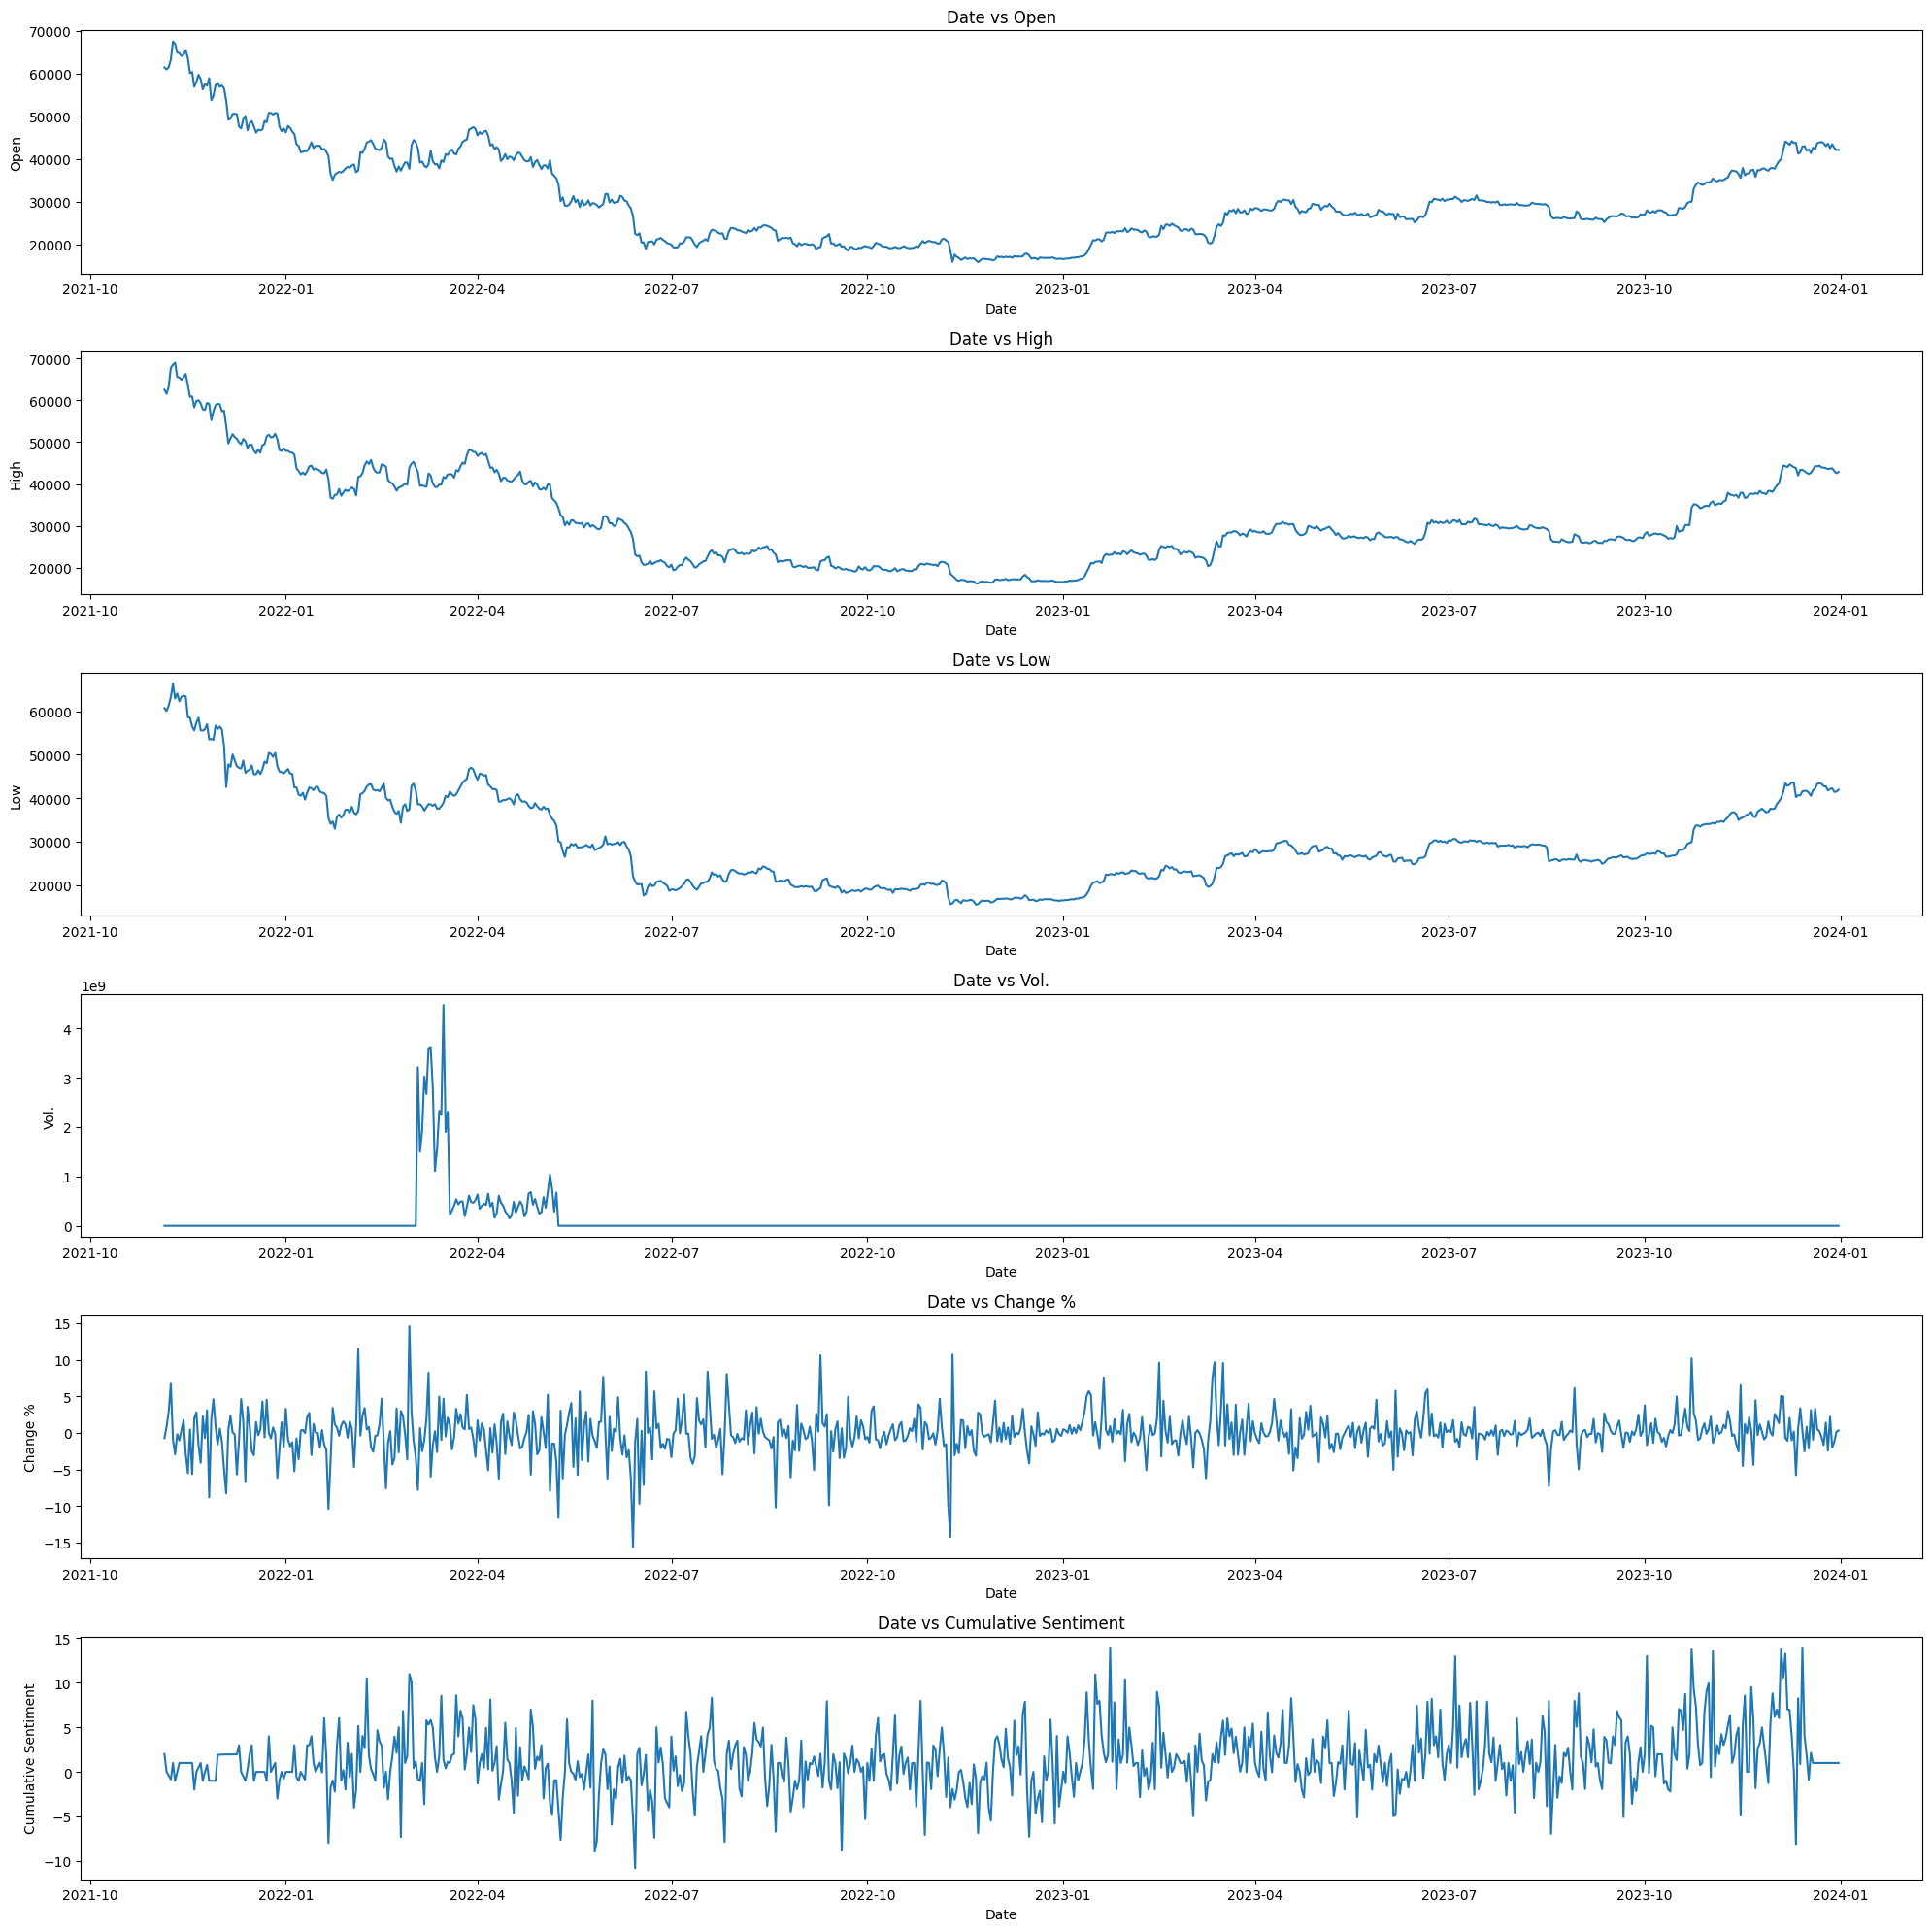

In [ ]:
import matplotlib.pyplot as plt

features = ['Open', 'High', 'Low', 'Vol.', 'Change %', 'Cumulative Sentiment']

fig, axes = plt.subplots(len(features), 1, figsize=(20, 20)) # Changed to 1 column

for i, feature1 in enumerate(features):
  axes[i].plot(final_df['Date'], final_df[feature1]) # Now axes[i] refers to a single Axes object
  axes[i].set_xlabel('Date')
  axes[i].set_ylabel(feature1)
  axes[i].set_title('Date vs '+ feature1) # Corrected title formatting


plt.tight_layout()
plt.show()

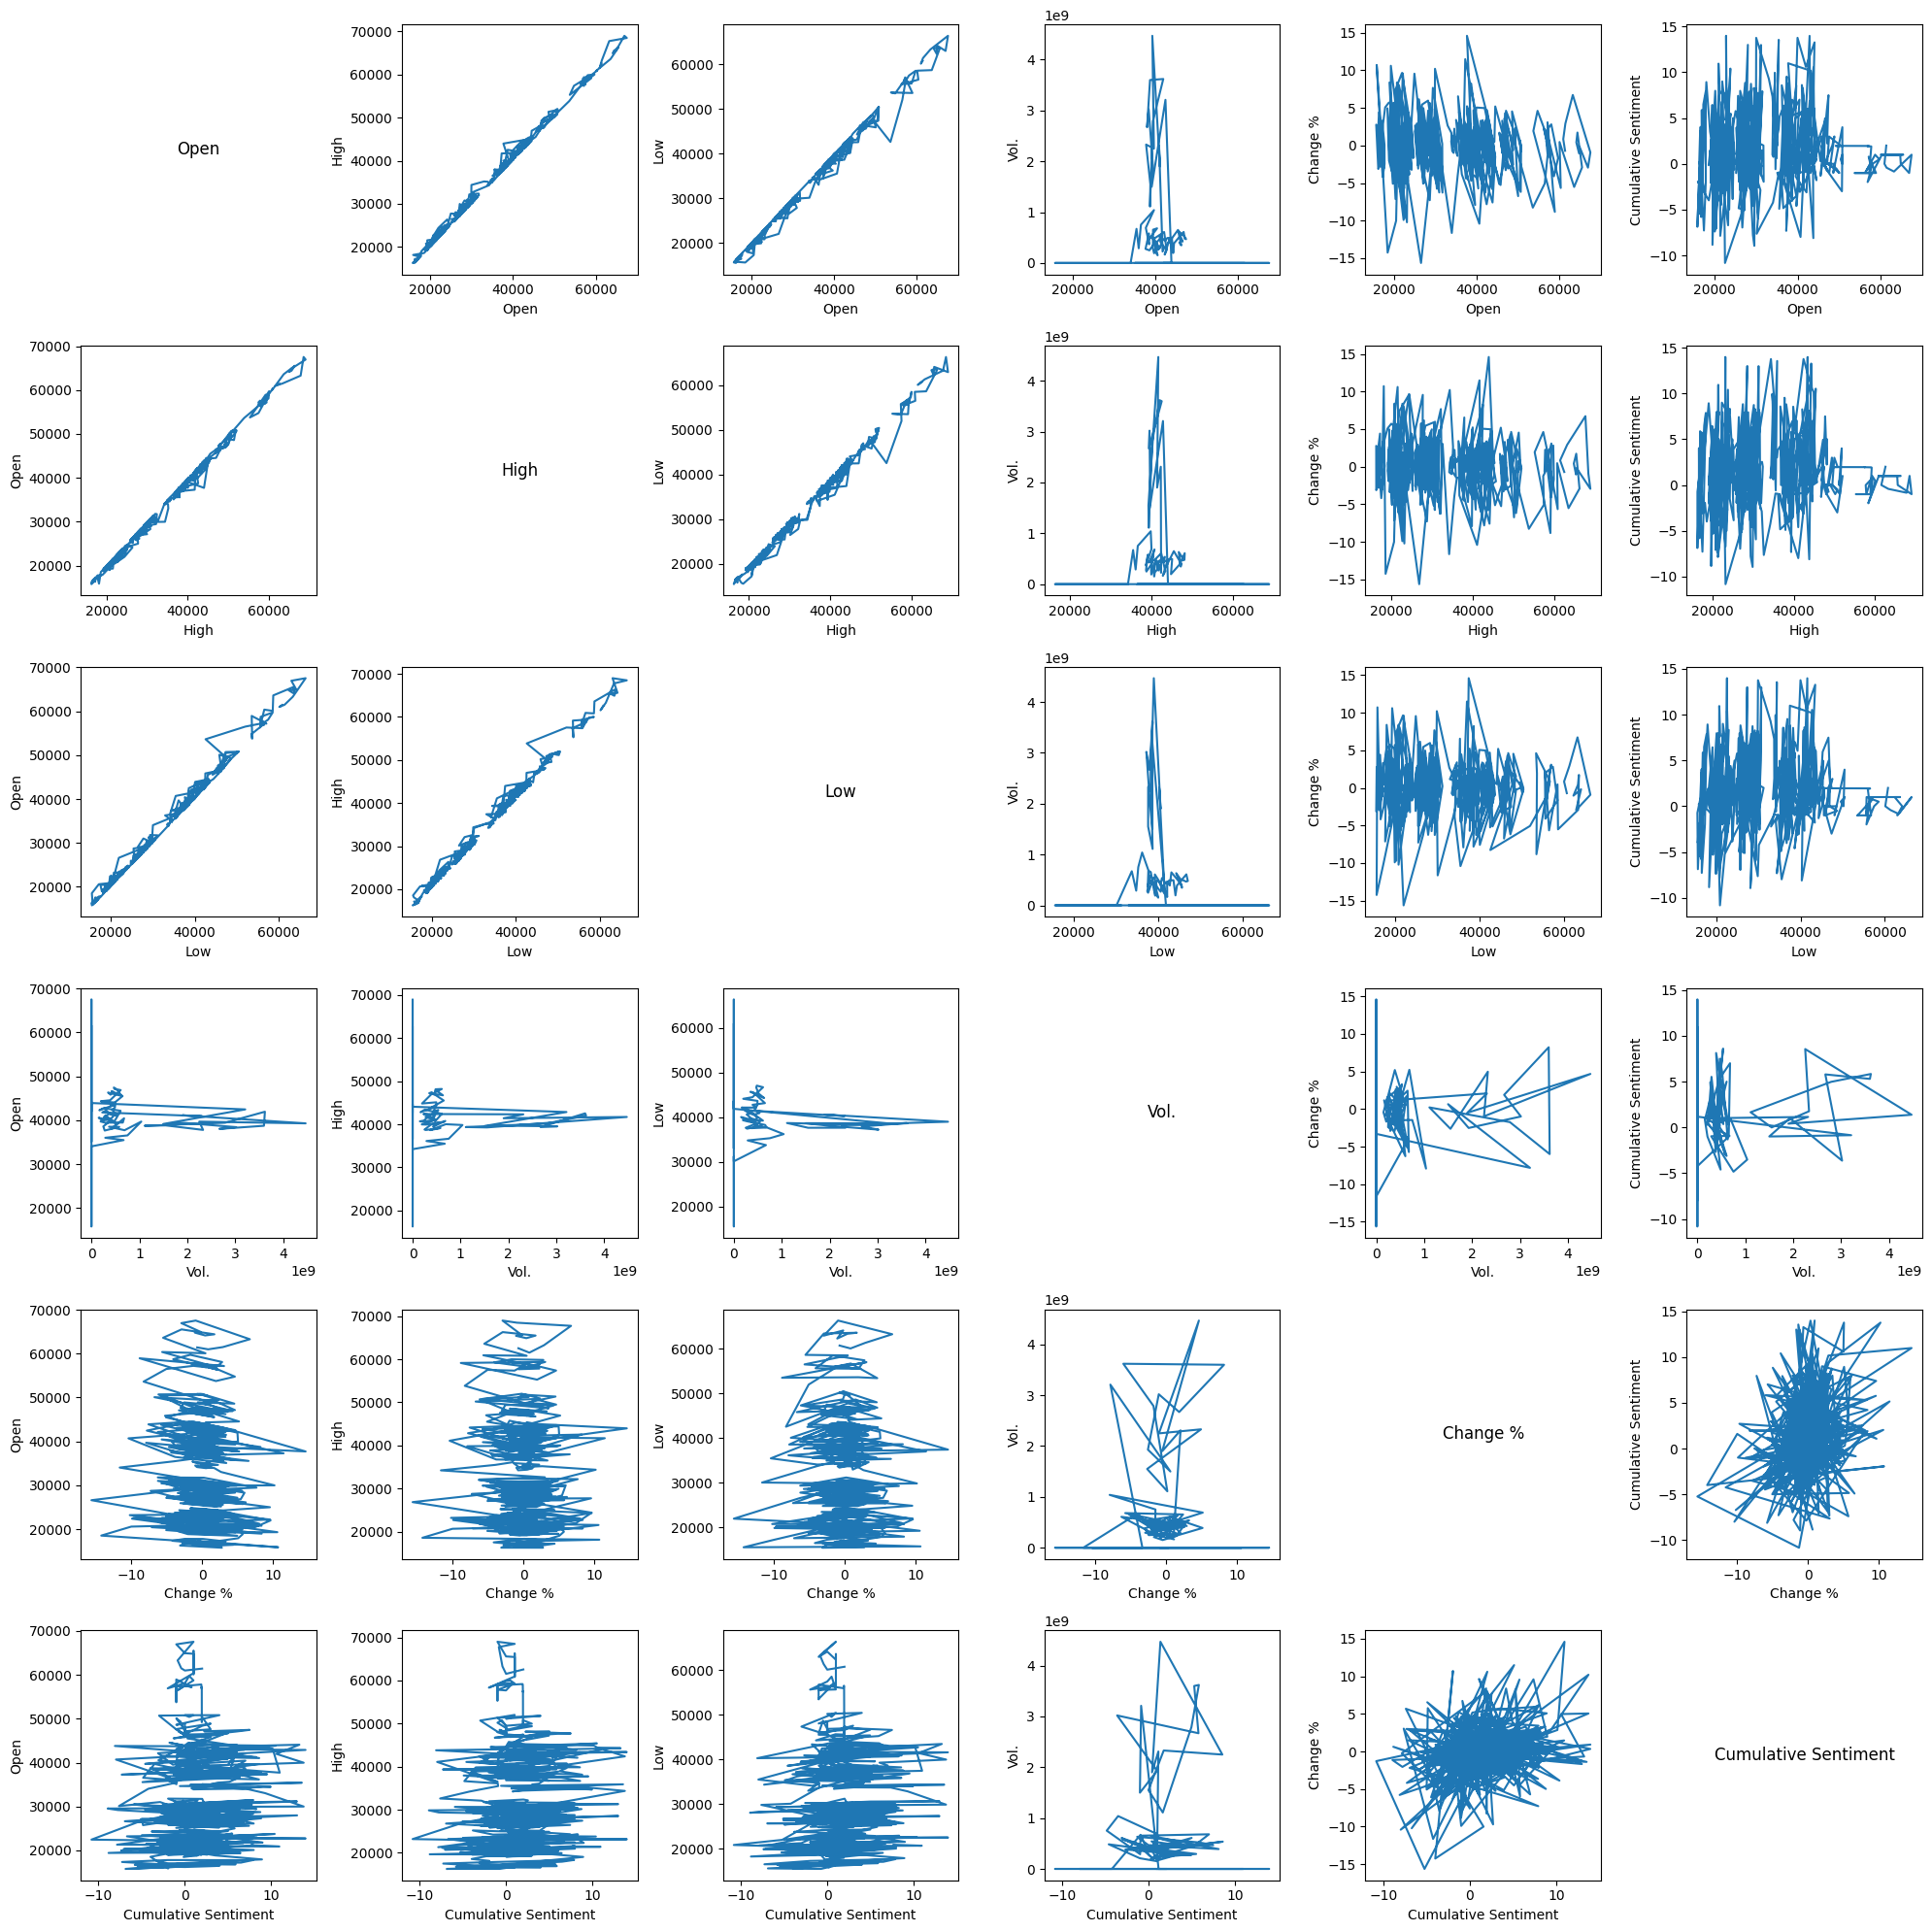

In [ ]:
features = ['Open', 'High', 'Low', 'Vol.', 'Change %', 'Cumulative Sentiment']

fig, axes = plt.subplots(len(features), len(features), figsize=(20, 20))

for i, feature1 in enumerate(features):
    for j, feature2 in enumerate(features):
        if i == j:
          axes[i, j].text(0.5, 0.5, f"{feature1}", ha='center', va='center', fontsize=12)
          axes[i, j].axis('off')

        else:
          axes[i, j].plot(final_df[feature1], final_df[feature2])
          axes[i, j].set_xlabel(feature1)
          axes[i, j].set_ylabel(feature2)


plt.tight_layout()
plt.show()

intersting observation:
change and cumulative sentiment have high corerelation which is not expected as they are form differnt datasets, hence this proves that twiter sentiment analysis has high weight to predict price of bitcoin.



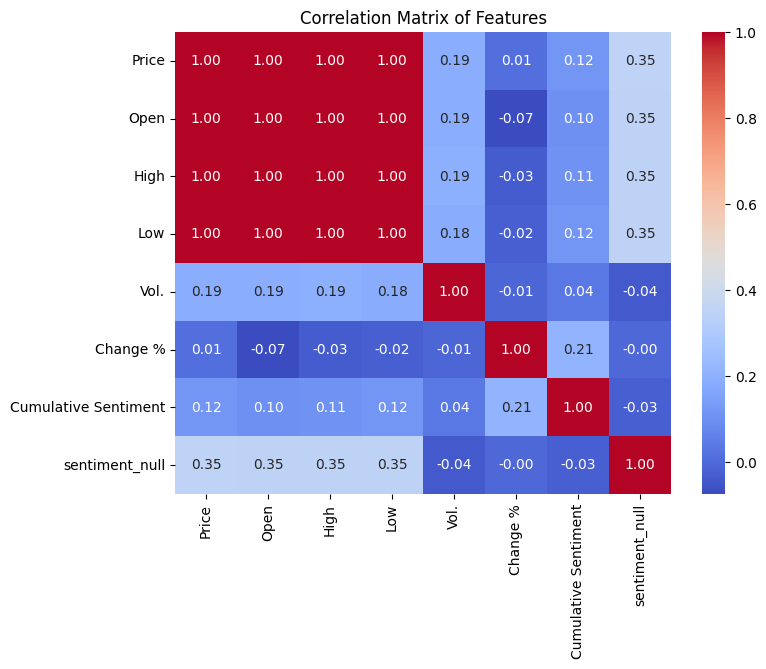

In [ ]:
import seaborn as sns
features= ['Price','Open', 'High', 'Low', 'Vol.', 'Change %', 'Cumulative Sentiment','sentiment_null']
correlation_matrix = final_df[features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

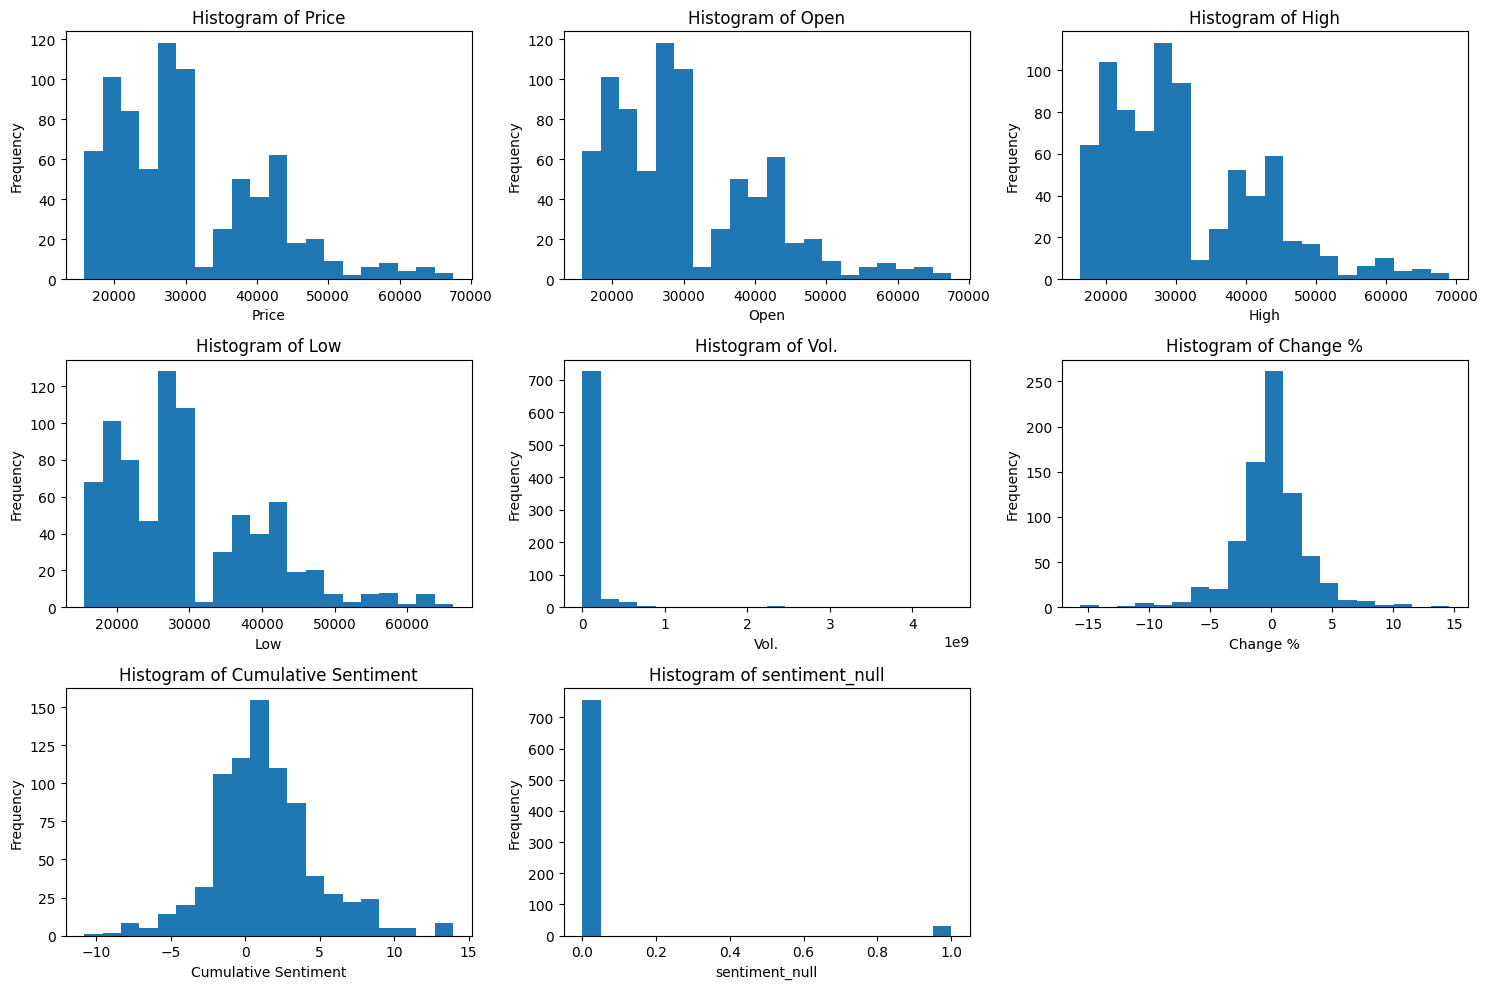

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)
    plt.hist(final_df[col], bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

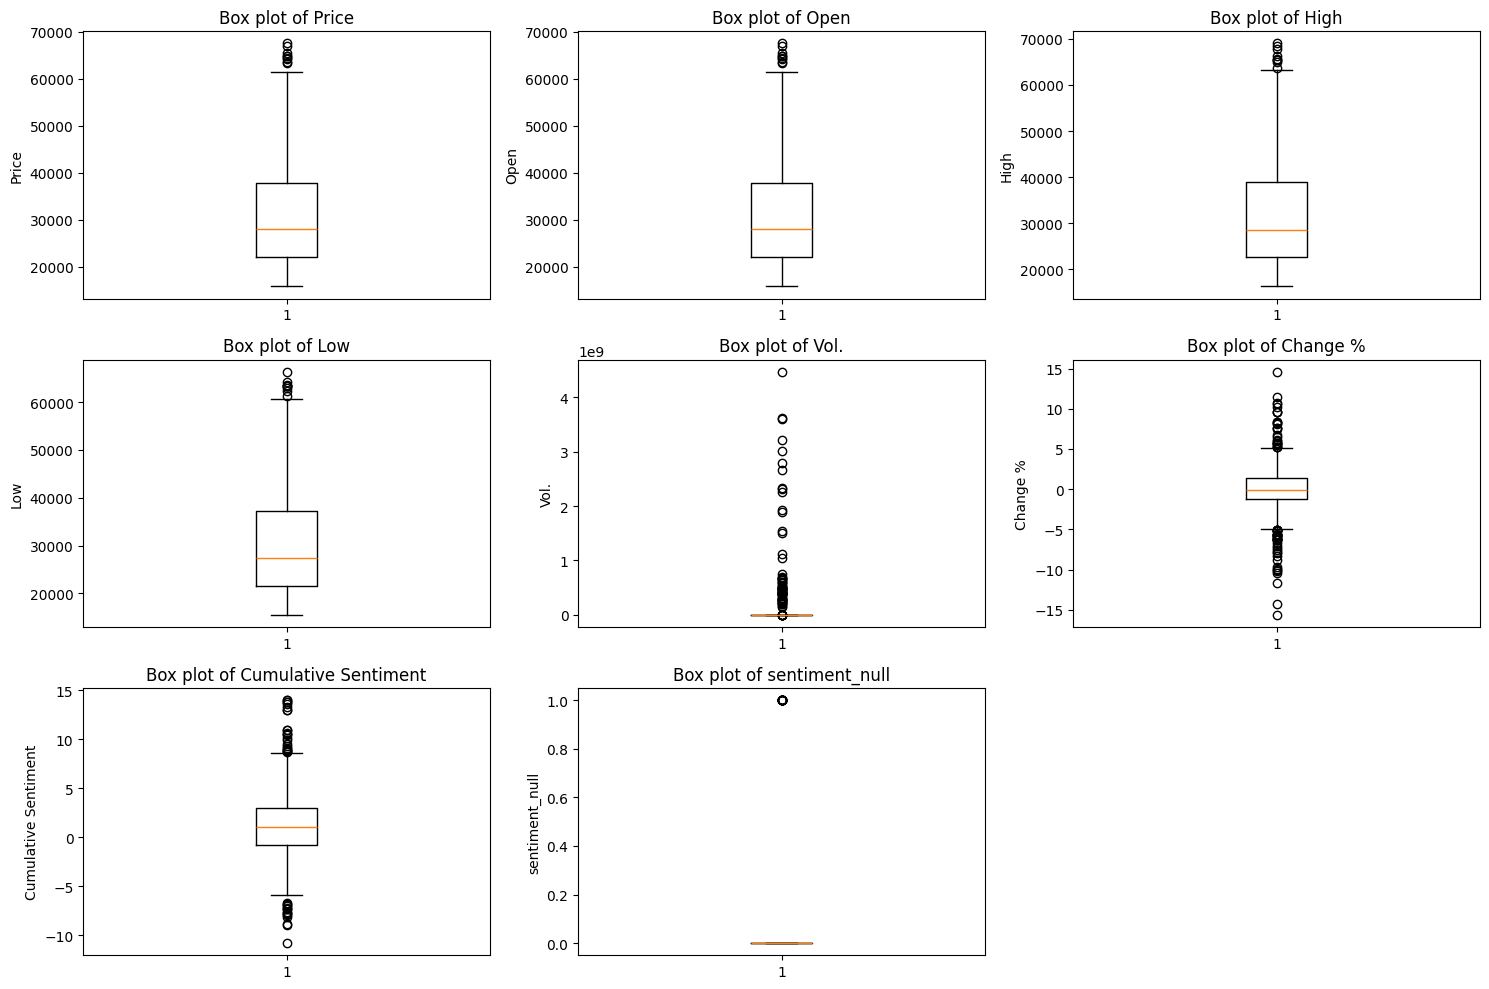

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(final_df[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [ ]:
final_df

,Date,Price,Open,High,Low,Vol.,Change %,Cumulative Sentiment,sentiment_null
0,2021-11-05,60974.3,61411.5,62560.3,60742.4,44460.0,-0.71,1.998016,0
1,2021-11-06,61483.9,60973.2,61543.2,60093.6,34890.0,0.84,0.000000,0
2,2021-11-07,63273.2,61483.8,63273.2,61347.2,34340.0,2.91,-0.419882,1
3,2021-11-08,67527.9,63276.4,67763.3,63276.4,81080.0,6.72,-0.839764,0
4,2021-11-09,66904.4,67528.7,68493.3,66334.9,66130.0,-0.92,0.999633,0
...,...,...,...,...,...,...,...,...,...
782,2023-12-27,43446.5,42514.3,43676.7,42115.3,50100.0,2.20,0.999580,1
783,2023-12-28,42581.1,43446.5,43782.6,42309.3,49840.0,-1.99,0.999580,1
784,2023-12-29,42072.4,42581.1,43108.0,41459.0,60980.0,-1.19,0.999580,1
785,2023-12-30,42136.7,42074.7,42592.2,41527.3,35180.0,0.15,0.999580,0


In [ ]:
final_df['difference'] = final_df['High'] - final_df['Low']
final_df = final_df.drop(['Open'], axis=1)
final_df

,Date,Price,High,Low,Vol.,Change %,Cumulative Sentiment,sentiment_null,difference
0,2021-11-05,60974.3,62560.3,60742.4,44460.0,-0.71,1.998016,0,1817.9
1,2021-11-06,61483.9,61543.2,60093.6,34890.0,0.84,0.000000,0,1449.6
2,2021-11-07,63273.2,63273.2,61347.2,34340.0,2.91,-0.419882,1,1926.0
3,2021-11-08,67527.9,67763.3,63276.4,81080.0,6.72,-0.839764,0,4486.9
4,2021-11-09,66904.4,68493.3,66334.9,66130.0,-0.92,0.999633,0,2158.4
...,...,...,...,...,...,...,...,...,...
782,2023-12-27,43446.5,43676.7,42115.3,50100.0,2.20,0.999580,1,1561.4
783,2023-12-28,42581.1,43782.6,42309.3,49840.0,-1.99,0.999580,1,1473.3
784,2023-12-29,42072.4,43108.0,41459.0,60980.0,-1.19,0.999580,1,1649.0
785,2023-12-30,42136.7,42592.2,41527.3,35180.0,0.15,0.999580,0,1064.9


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


X = final_df.drop('Price', axis=1)
y = final_df['Price']

X['Date'] = pd.to_datetime(X['Date']).apply(lambda date: date.toordinal())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

In [ ]:
final_df

,Date,Price,High,Low,Vol.,Change %,Cumulative Sentiment,sentiment_null,difference
0,2021-11-05,60974.3,62560.3,60742.4,44460.0,-0.71,1.998016,0,1817.9
1,2021-11-06,61483.9,61543.2,60093.6,34890.0,0.84,0.000000,0,1449.6
2,2021-11-07,63273.2,63273.2,61347.2,34340.0,2.91,-0.419882,1,1926.0
3,2021-11-08,67527.9,67763.3,63276.4,81080.0,6.72,-0.839764,0,4486.9
4,2021-11-09,66904.4,68493.3,66334.9,66130.0,-0.92,0.999633,0,2158.4
...,...,...,...,...,...,...,...,...,...
782,2023-12-27,43446.5,43676.7,42115.3,50100.0,2.20,0.999580,1,1561.4
783,2023-12-28,42581.1,43782.6,42309.3,49840.0,-1.99,0.999580,1,1473.3
784,2023-12-29,42072.4,43108.0,41459.0,60980.0,-1.19,0.999580,1,1649.0
785,2023-12-30,42136.7,42592.2,41527.3,35180.0,0.15,0.999580,0,1064.9


In [ ]:
X = final_df.drop(['Price','High','Low'], axis=1) # Pass labels to drop as a list
y = final_df['Price']

X['Date'] = pd.to_datetime(X['Date']).apply(lambda date: date.toordinal())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

y_pred = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {best_r2}")

Mean Squared Error: 43591544.67827088
Mean Absolute Error: 4579.562151898733
R-squared: 0.9681628404634086


In [ ]:
X = final_df.drop('Price', axis=1)
y = final_df['Price']

X['Date'] = pd.to_datetime(X['Date']).apply(lambda date: date.toordinal())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_n_neighbors = 1
best_r2 = -1

for n_neighbors in range(1, 50):
    knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"n_neighbors: {n_neighbors}, R-squared: {r2}")

    if r2 > best_r2:
        best_r2 = r2
        best_n_neighbors = n_neighbors

print(f"Best n_neighbors: {best_n_neighbors}, Best R-squared: {best_r2}")

best_knn_model = KNeighborsRegressor(n_neighbors=best_n_neighbors)
best_knn_model.fit(X_train, y_train)

y_pred = best_knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {best_r2}")

n_neighbors: 1, R-squared: 0.9603861163955615
n_neighbors: 2, R-squared: 0.9663348784630875
n_neighbors: 3, R-squared: 0.9681628404634086
n_neighbors: 4, R-squared: 0.9629140985943362
n_neighbors: 5, R-squared: 0.9574336861190744
n_neighbors: 6, R-squared: 0.9535306937934127
n_neighbors: 7, R-squared: 0.9500294658504984
n_neighbors: 8, R-squared: 0.9469044191545838
n_neighbors: 9, R-squared: 0.9425814125184386
n_neighbors: 10, R-squared: 0.9392754822620062
n_neighbors: 11, R-squared: 0.9347661789302776
n_neighbors: 12, R-squared: 0.9303309570848565
n_neighbors: 13, R-squared: 0.9276016233061435
n_neighbors: 14, R-squared: 0.9258387073508586
n_neighbors: 15, R-squared: 0.9218806694640721
n_neighbors: 16, R-squared: 0.9186573834677451
n_neighbors: 17, R-squared: 0.9160514340802175
n_neighbors: 18, R-squared: 0.9126038231644498
n_neighbors: 19, R-squared: 0.9102520655811241
n_neighbors: 20, R-squared: 0.9064373411534367
n_neighbors: 21, R-squared: 0.9027180761411902
n_neighbors: 22, R-squ

In [ ]:
# prompt: make a api call to find high value and low value of today bitcoin in ruppes

import requests

def get_bitcoin_price_inr():
  try:
    url = "https://api.coingecko.com/api/v3/simple/price?ids=bitcoin&vs_currencies=inr"
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes

    data = response.json()
    if "bitcoin" in data and "inr" in data["bitcoin"]:
      current_price = data["bitcoin"]["inr"]
      print(f"Current Bitcoin Price (INR): {current_price}")
      return current_price
    else:
      print("Error: Could not retrieve Bitcoin price data from the API.")
      return None

  except requests.exceptions.RequestException as e:
    print(f"Error during API request: {e}")
    return None

# Example usage:
high = get_bitcoin_price_inr()
low = get_bitcoin_price_inr()

Current Bitcoin Price (INR): 8084526
Current Bitcoin Price (INR): 8084526


In [ ]:
import datetime

def predict_price(high, low, vol, change_percent, cumulative_sentiment, sentiment_null,difference):
    today = datetime.date.today().toordinal()
    input_data = pd.DataFrame({
        'Date': [today],
        'High': [high],
        'Low': [low],
        'Vol.': [vol], # vol and change_percent are converted to numeric values
        'Change %': [change_percent],
        'Cumulative Sentiment': [cumulative_sentiment],
        'sentiment_null': [sentiment_null],
        'difference': [difference]
    })

    # Make prediction using the trained model
    predicted_price = best_knn_model.predict(input_data)
    return predicted_price[0]

#  Convert vol and change_percent to numeric values before calling predict_price
vol = float(final_df['Vol.'].mode()[0])  # Extract the first value of the mode and convert to float
change_percent = float(final_df['Change %'].mean())  # Extract the first value of the mode and convert to float

print("predicted twitter sentiment")
cumulative_sentiment = float(input())
sentiment_null = 0
difference=float(final_df['difference'].mean())

predicted_price = predict_price(high, low, vol, change_percent, cumulative_sentiment, sentiment_null,difference)
print(f"Predicted Bitcoin price: {predicted_price*100}")

predicted twitter sentiment
0
Predicted Bitcoin price: 6645496.666666666


In [ ]:
# prompt: just train my final_df with gradient boosting algorithm

from sklearn.ensemble import GradientBoostingRegressor

# ... (Your existing code) ...

X = final_df.drop('Price', axis=1)
y = final_df['Price']

X['Date'] = pd.to_datetime(X['Date']).apply(lambda date: date.toordinal())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)  # You can tune hyperparameters here
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


def predict_price(high, low, vol, change_percent, cumulative_sentiment, sentiment_null, difference):
    today = datetime.date.today().toordinal()
    input_data = pd.DataFrame({
        'Date': [today],
        'High': [high],
        'Low': [low],
        'Vol.': [vol],
        'Change %': [change_percent],
        'Cumulative Sentiment': [cumulative_sentiment],
        'sentiment_null': [sentiment_null],
        'difference': [difference]
    })
    predicted_price = gb_model.predict(input_data) # Use gb_model for prediction
    return predicted_price[0]

# ... (rest of your code)

Mean Squared Error: 257681.7892659127
R-squared: 0.9975572309638566
Mean Absolute Error: 282.1412014298891


In [ ]:
# prompt: now do hyper parameter tuning use many values to test using for loop

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GradientBoostingRegressor
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.5], # Step size shrinkage used in update to prevent overfitting
    'max_depth': [3, 5, 7], # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4] # Minimum number of samples required to be at a leaf node
}

# Create a GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model
best_gb_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_gb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

def predict_price(high, low, vol, change_percent, cumulative_sentiment, sentiment_null, difference):
    today = datetime.date.today().toordinal()
    input_data = pd.DataFrame({
        'Date': [today],
        'High': [high],
        'Low': [low],
        'Vol.': [vol],
        'Change %': [change_percent],
        'Cumulative Sentiment': [cumulative_sentiment],
        'sentiment_null': [sentiment_null],
        'difference': [difference]
    })
    predicted_price = best_gb_model.predict(input_data) # Use best_gb_model for prediction
    return predicted_price[0]

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error: 265831.48785066605
R-squared: 0.997479973539444
Mean Absolute Error: 283.69268136287013


In [ ]:
def predict_price_gb(high, low, vol, change_percent, cumulative_sentiment, sentiment_null, difference):
    today = datetime.date.today().toordinal()
    input_data = pd.DataFrame({
        'Date': [today],
        'High': [high],
        'Low': [low],
        'Vol.': [vol],
        'Change %': [change_percent],
        'Cumulative Sentiment': [cumulative_sentiment],
        'sentiment_null': [sentiment_null],
        'difference': [difference]
    })
    predicted_price = best_gb_model.predict(input_data)
    return predicted_price[0]

# Example usage with Gradient Boosting prediction
vol = float(final_df['Vol.'].mode()[0])
change_percent = float(final_df['Change %'].mean())
cumulative_sentiment = float(input("Enter cumulative sentiment: "))  # Get user input
sentiment_null = 0
difference = float(final_df['difference'].mean())

predicted_price_gb = predict_price_gb(high, low, vol, change_percent, cumulative_sentiment, sentiment_null, difference)
print(f"Predicted Bitcoin price (Gradient Boosting): {predicted_price_gb*100}")

Enter cumulative sentiment: 0
Predicted Bitcoin price (Gradient Boosting): 6257316.26274609


In [ ]:
# prompt: get the actual price of bitcoin in ruppes

def get_bitcoin_price_inr():
  try:
    url = "https://api.coingecko.com/api/v3/simple/price?ids=bitcoin&vs_currencies=inr"
    response = requests.get(url)
    response.raise_for_status()

    data = response.json()
    if "bitcoin" in data and "inr" in data["bitcoin"]:
      current_price = data["bitcoin"]["inr"]
      return current_price
    else:
      print("Error: Could not retrieve Bitcoin price data from the API.")
      return None

  except requests.exceptions.RequestException as e:
    print(f"Error during API request: {e}")
    return None

# Example usage:
bitcoin_price_inr = get_bitcoin_price_inr()

if bitcoin_price_inr:
    print(f"Current Bitcoin Price (INR): {bitcoin_price_inr}")

Current Bitcoin Price (INR): 8097345


In [ ]:
def mod(a):
  if a<0:
    return -a
  else:
    return a
print("knn",bitcoin_price_inr-(predicted_price*100))
print("gradient boosting",bitcoin_price_inr-(predicted_price_gb*100))
if(mod(bitcoin_price_inr-(predicted_price*100))>mod(bitcoin_price_inr-(predicted_price_gb*100))):
  print("knn is better performing model")
else:
  print("gradient boosting is better performing model")

knn 1451848.333333334
gradient boosting 1840028.73725391
gradient boosting is better performing model
